# Day 2 - Parameterization of interatomic potentials

In this tutorial we will do simple fits for three different interatomic potentials.
* Embedded Atom Method Potential
* Neural Network Potential
* Atomic Cluster Expansion

Some details of these potentials will be summarized in the following.

## Embedded Atom Method Potential

* Atomic descriptors: pair functions

$\rho_i = \sum_j \phi(r_{ij})$ (density)

$V_i = \sum_j V(r_{ij})$ (pair repulsion)
    
* Atomic energy

$E_i = F( \rho_i ) + V_i$     

with non-linear embedding function $F$

## Neural Network Potential

* Atomic descriptors: pair and three-body symmetry functions

$G_i = \sum_j \phi(r_{ij})$

$G_i = \sum_{jk} \phi(r_{ij},r_{ik}, \cos_{jik})$
    
* Atomic energy

$E_i = NN(G_i)$      

with neural network $NN$. Various different $G_i$ are the inputs to the $NN$.

## Atomic Cluster Expansion

* Atomic descriptors: pair, three-body, ... many-body basis functions

$A_i = \sum_j \phi(\pmb{r}_{ij})$       (many different basis functions that depend on direction and length of $r_{ij}$)

$\varphi_i = c_1 A_i + c_2 A_i A_i + c_3 A_i A_i A_i + ...$
  
* Atomic energy

$E_i = F(\varphi_i)$  

with general non-linear function $F$ and several $\varphi_i$. In the tutorial we will use $E_i =  \sqrt{\varphi^{(1)}_i} +  \varphi^{(2)}_i$ to make contact to the Embedded Atom Method.


# Reference data

The potentials are parameterized by fitting to reference data. Here we use DFT data for Cu that we generated with the FHI-aims code. In the following we summarize key properties of the dataset.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
from pyiron import Project

In [4]:
def proces_df(df):
    df["energy_per_atom"] = df["energy"]/df["number_of_atoms"]
    df["volume"]=df["atoms"].map(lambda at: at.get_volume())
    df["volume_per_atom"] = df["volume"]/df["number_of_atoms"]    

In [5]:
data_pr = Project("..")

In [7]:
data_pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,303,finished,None,df1_A1_A2_A3_EV_elast_phon,/df1_A1_A2_A3_EV_elast_phon,/home/yury/PycharmProjects/pyiron-2021/,pyiron_potentialfit/datasets/import_database/Cu_database/,2021-02-18 19:49:53.061360,None,None,zora@cmti001#1,TrainingContainer,0.4,None,None
1,304,finished,None,df3_10k,/df3_10k,/home/yury/PycharmProjects/pyiron-2021/,pyiron_potentialfit/datasets/import_database/Cu_database/,2021-02-18 19:49:55.496691,None,None,zora@cmti001#1,TrainingContainer,0.4,None,None
2,305,finished,None,df2_1k,/df2_1k,/home/yury/PycharmProjects/pyiron-2021/,pyiron_potentialfit/datasets/import_database/Cu_database/,2021-02-18 19:49:56.101883,None,None,zora@cmti001#1,TrainingContainer,0.4,None,None
3,306,finished,None,df4_2_5eV_25A3_8K,/df4_2_5eV_25A3_8K,/home/yury/PycharmProjects/pyiron-2021/,pyiron_potentialfit/datasets/import_database/Cu_database/,2021-02-18 19:49:57.547918,None,None,zora@cmti001#1,TrainingContainer,0.4,None,None


In [8]:
df1_job = data_pr.load('df1_A1_A2_A3_EV_elast_phon')
df2_job = data_pr.load('df2_1k')
df3_job = data_pr.load('df3_10k')
df4_job = data_pr.load('df4_2_5eV_25A3_8K')

In [9]:
df1 = df1_job.to_pandas()
df2 = df2_job.to_pandas()
df3 = df3_job.to_pandas()
df4 = df4_job.to_pandas()

dfs = [df1,df2,df3,df4]

In [10]:
for df in dfs:
    proces_df(df)

In [11]:
df_size=[len(df) for df in dfs]
df_num_atoms=[int(df["number_of_atoms"].sum()) for df in dfs]
labels=["df1","df2","df3","df4"]

In [12]:
df_stats = pd.DataFrame({"Name":labels, "Structures":df_size, "Atoms":df_num_atoms})
df_stats

,Name,Structures,Atoms
0,df1,105,368
1,df2,1000,11309
2,df3,10000,84133
3,df4,8073,71979


* Dataset1 (df1): 105 structures: E-V, elastic matrix and phonopy deformations for fcc, bcc, hcp
* Dataset2 (df2): 1k structures: Dataset1+ more prototypes (ideal and distroted), selected within 1eV window above  groundstate
* Dataset3 (df3): 10k structures: Dataset2 + long-range E-V curves + 1000 fcc surface structures (stretched, shaked, etc.)
* Dataset4 (df4): 8k structures: all structures within 2.5eV/atom window above ground state and up to 25 A^3/atom volume

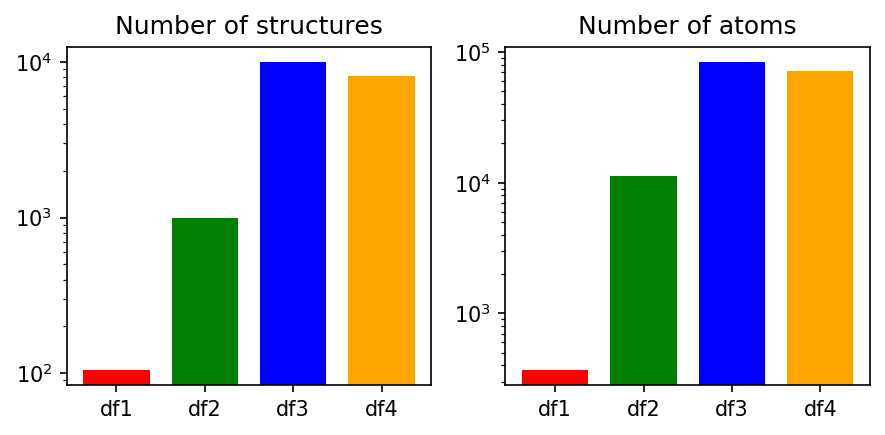

In [13]:
xs = np.arange(len(df_size))
width = 0.75  
colors=["red","green","blue","orange"]

fig, (ax,ax2) = plt.subplots(1,2,figsize=(6,3), dpi=150)

ax.bar(df_stats.index, df_stats["Structures"], width=width, color=colors)
ax.set_yscale('log')
ax.set_title('Number of structures')
ax.set_xticks(df_stats.index)
ax.set_xticklabels(df_stats["Name"])

ax2.bar(df_stats.index, df_stats["Atoms"], width=width, color=colors)
ax2.set_yscale('log')
ax2.set_title('Number of atoms')
ax2.set_xticks(df_stats.index)
ax2.set_xticklabels(df_stats["Name"])

fig.tight_layout()

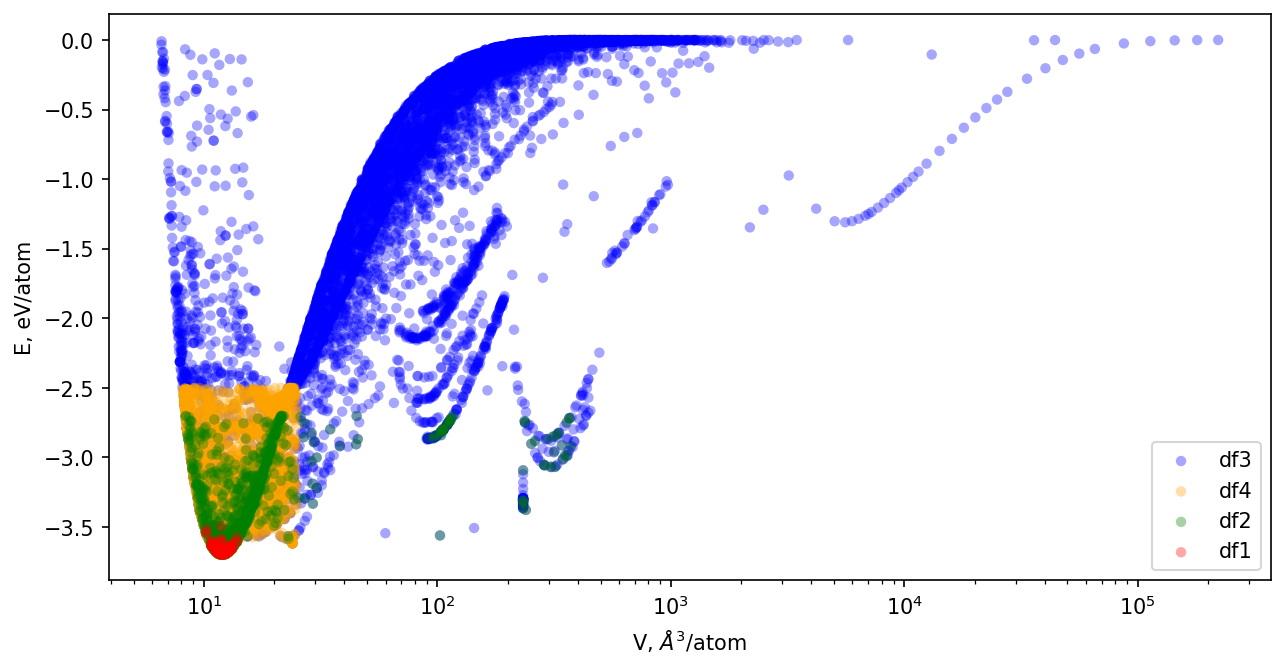

In [14]:
alpha= 0.35
s=25

plt.figure(figsize=(10,5), dpi=150)
plt.scatter(df3["volume_per_atom"], df3["energy_per_atom"], label="df3", s=s, color="blue",ec=None, alpha=alpha)
plt.scatter(df4["volume_per_atom"], df4["energy_per_atom"], label="df4", s=s, color="orange",ec=None, alpha=alpha)
plt.scatter(df2["volume_per_atom"], df2["energy_per_atom"], label="df2", s=s, color="green",ec=None, alpha=alpha)
plt.scatter(df1["volume_per_atom"], df1["energy_per_atom"], label="df1", s=s, color="red",ec=None, alpha=alpha)
plt.xscale('log')
plt.xlabel('V, $\\AA^3$/atom')
plt.ylabel('E, eV/atom')
plt.legend()